# 0. Load Data

In [1]:

import pandas as pd
import pandas as pd
import geopandas as gpd
from typing import Sequence
import pickle
import pandas as pd
from scipy.stats import gaussian_kde
from function import *
from function import PATHS


df=pd.read_csv(PATHS['data_prediction_net_benefit'])
df2=pd.read_csv(PATHS['data_strategies'])
# Load the point density data from pickle
with open(PATHS['point_density'], 'rb') as f:
    density_data = pickle.load(f)

xy_coords = density_data['coordinates'] 
z = density_data['density']


gogogo


: 

# 1. Emission Map

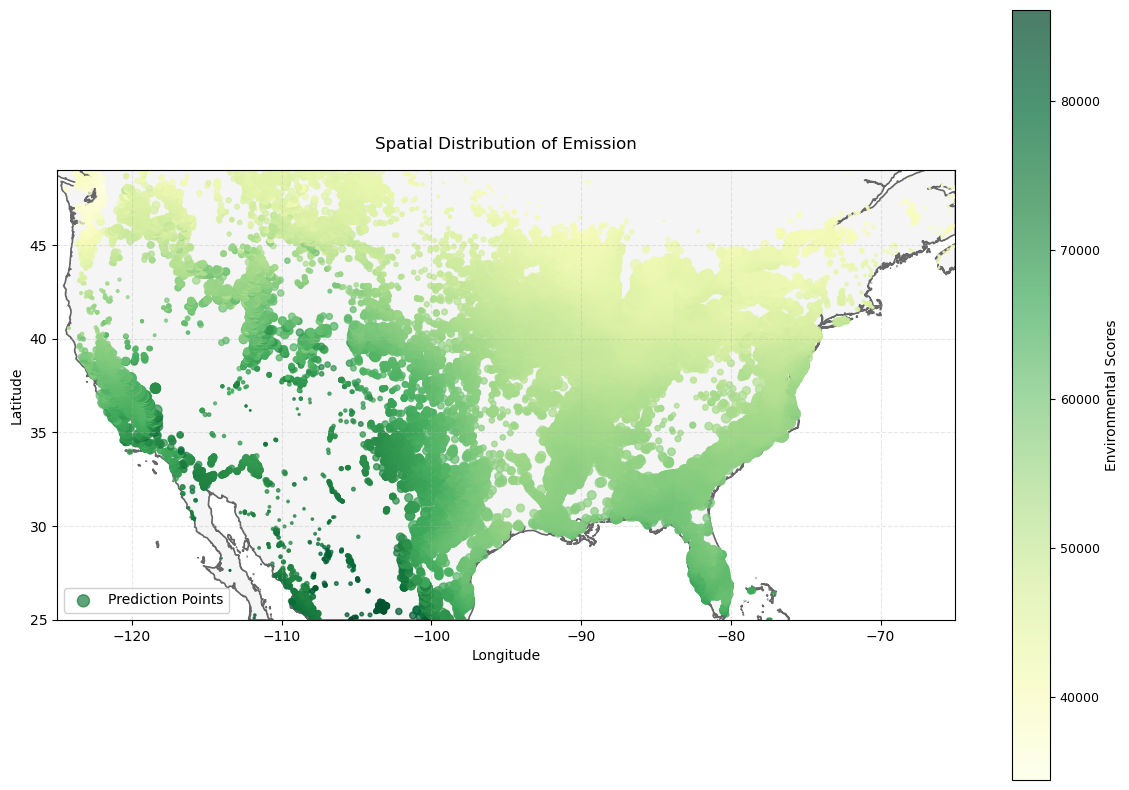

In [4]:
import geopandas as gpd
from function import * 
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde

# Create figure and set size
fig, ax = plt.subplots(figsize=(12,8))

# Define USA mainland bounds
usa_bounds_main = {
        'lon_min': -125,  # Westernmost point (Washington state)
        'lon_max': -65,   # Easternmost point (Maine)
        'lat_min': 25,    # Southernmost point (Florida)
        'lat_max': 49     # Northernmost point (Canada border)
    }
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Set plot bounds to USA mainland
ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

# Draw USA mainland base map with more prominent borders
us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Create gradient colormap for training points (orange)
train_colors = np.array(['#fff2e6', '#ffd9b3', '#ffbf80', '#ffa64d', '#ff8c1a'])  # Light to dark orange
rgb_train_colors = np.linspace(plt.matplotlib.colors.to_rgb(train_colors[0]), 
                        plt.matplotlib.colors.to_rgb(train_colors[-1]), 
                        256)
train_cmap = ListedColormap(rgb_train_colors)



# Plot prediction points with size based on density
scatter = ax.scatter(df['lon'], df['lat'],
                    c=df['carbon_emission (t)/yr'],
                    s=150 * z/z.max(),  # Increased size multiplier from 100 to 150
                    cmap=pred_cmap,
                    alpha=0.7,
                    label='Prediction Points')

# # Plot training points with smaller size
# train_scatter = ax.scatter(us_df_embedding_fill['lon'], us_df_embedding_fill['lat'],
#                           alpha=0.4, s=8, c='orange',  # Reduced size from 15 to 8
#                           label='Training Points')

# Add colorbar
cbar = plt.colorbar(scatter, label='Environmental Scores', ax=ax)
cbar.ax.tick_params(labelsize=9)

# Set chart style
ax.set_xlabel('Longitude', fontsize=10)
ax.set_ylabel('Latitude', fontsize=10)
ax.set_title('Spatial Distribution of Emission', 
             fontsize=12, pad=15)
ax.legend(frameon=True, facecolor='white', framealpha=0.9)
ax.grid(True, linestyle='--', alpha=0.3)

# Adjust layout
plt.tight_layout()
plt.show()

# 2. Opportunity Loss Map

In [ ]:
df=pd.read_csv(PATHS['data_prediction_net_benefit'])

### 2.1 KDE

  0%|          | 0/9 [00:00<?, ?it/s]

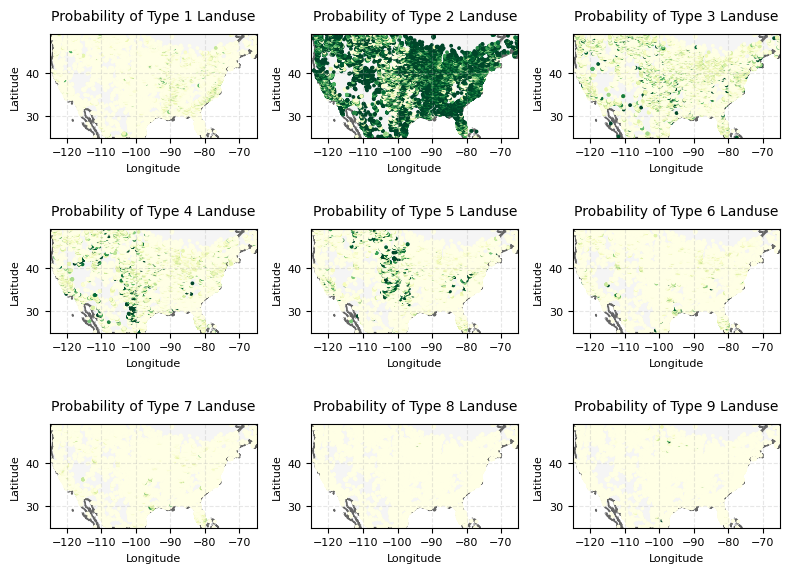

In [10]:
import geopandas as gpd
from function import * 
from shapely.geometry import box
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from function import PATHS
from tqdm.auto import tqdm
df=pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Create figure with GridSpec
fig = plt.figure(figsize=(8, 6))
gs = fig.add_gridspec(3, 3)

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,  # Westernmost point (Washington state)
    'lon_max': -65,   # Easternmost point (Maine)
    'lat_min': 25,    # Southernmost point (Florida)
    'lat_max': 49     # Northernmost point (Canada border)
}
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

world = gpd.read_file(PATHS['World_shp'])
us_main = world.clip(bbox)

# Create YlGn colormap for prediction points
pred_colors = plt.cm.YlGn(np.linspace(0, 1, 256))
pred_cmap = ListedColormap(pred_colors)

# Plot each weighted density in a subplot
for i in tqdm(range(9)):
    row = i // 3
    col = i % 3
    weight_num = i + 1
    
    ax = fig.add_subplot(gs[row, col])
    
    # Set plot bounds to USA mainland
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])
    
    # Draw USA mainland base map
    us_main.plot(ax=ax, color='#f5f5f5', edgecolor='#666666', linewidth=1.2)
    
    # Plot prediction points
    scatter = ax.scatter(df['lon'], df['lat'],
                        c=df[f'weighted_density_{weight_num}'],
                        s=3,  # Smaller point size for subplots
                        cmap=pred_cmap)
    
    # # Add colorbar
    # plt.colorbar(scatter, ax=ax, label=f'Density {weight_num}')
    
    # Set chart style
    ax.set_xlabel('Longitude', fontsize=8)
    ax.set_ylabel('Latitude', fontsize=8)
    ax.set_title(f'Probability of Type {weight_num} Landuse', 
                 fontsize=10, pad=10)
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.tick_params(labelsize=8)

# Adjust layout
plt.tight_layout()
plt.show()

### 2.2 County_Plane

Creating spatial index...
Calculating county densities for Ecological type...


  0%|          | 0/3233 [00:00<?, ?it/s]

Calculating county densities for Agricultural type...


  0%|          | 0/3233 [00:00<?, ?it/s]

Calculating county densities for Others type...


  0%|          | 0/3233 [00:00<?, ?it/s]

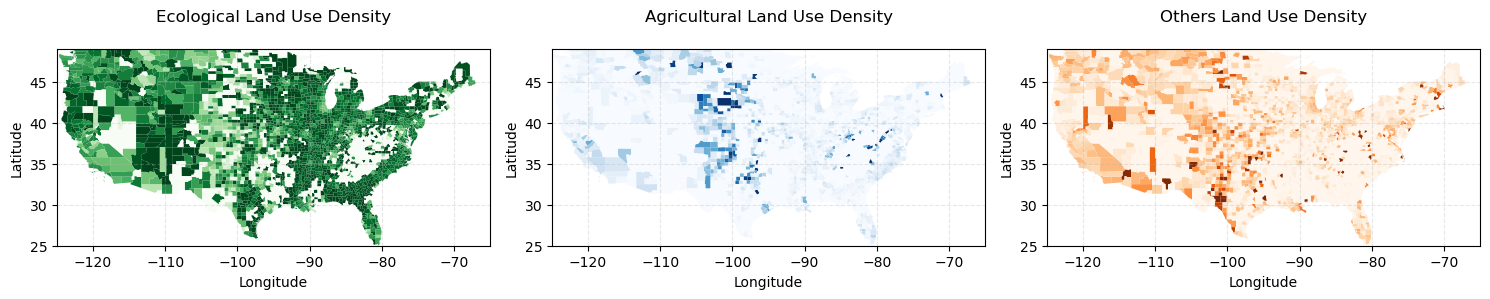

In [52]:
import geopandas as gpd
from function import * 
from shapely.geometry import box, Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from function import PATHS
from tqdm.auto import tqdm
from rtree import index
import matplotlib.gridspec as gridspec

# Read data
df = pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Combine land use types
df['weighted_density_type1'] = df['weighted_density_2'] + df['weighted_density_6']  # Ecological
df['weighted_density_type2'] = df['weighted_density_1'] + df['weighted_density_5'] + df['weighted_density_7']  # Agricultural
df['weighted_density_type3'] = df['weighted_density_3'] + df['weighted_density_4'] + df['weighted_density_8'] + df['weighted_density_9']  # Others

us_county = gpd.read_file(PATHS['us_county'])

# Create figure with GridSpec
fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(1, 3, figure=fig)

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 25,
    'lat_max': 49
}

# Create spatial index
print("Creating spatial index...")
spatial_index = index.Index()
for i, point in enumerate(zip(df['lon'], df['lat'])):
    spatial_index.insert(i, (point[0], point[1], point[0], point[1]))

# Plot for each combined type
type_names = ['Ecological', 'Agricultural', 'Others']
cmaps = ['Greens', 'Blues', 'Oranges']  # Different color schemes for each type

for idx in range(3):
    print(f"Calculating county densities for {type_names[idx]} type...")
    county_densities = []
    
    for _, county in tqdm(us_county.iterrows(), total=len(us_county)):
        bounds = county.geometry.bounds
        possible_points = list(spatial_index.intersection(bounds))
        
        points_in_county = []
        for point_idx in possible_points:
            point = Point(df.iloc[point_idx]['lon'], df.iloc[point_idx]['lat'])
            if county.geometry.contains(point):
                points_in_county.append(df.iloc[point_idx][f'weighted_density_type{idx+1}'])
        
        mean_density = np.mean(points_in_county) if points_in_county else 0
        county_densities.append(mean_density)

    us_county[f'mean_density_type{idx+1}'] = county_densities
    
    # Create subplot using GridSpec
    ax = fig.add_subplot(gs[0, idx])
    
    # Plot choropleth map without colorbar
    us_county.plot(column=f'mean_density_type{idx+1}', 
                   ax=ax,
                   legend=False,
                   cmap=cmaps[idx],  # Use different color scheme for each type
                   missing_kwds={'color': 'lightgrey'})

    # Set bounds
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])

    # Style
    ax.set_title(f'{type_names[idx]} Land Use Density', pad=20)
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### 2.3 Choropleth Map

Creating spatial index...
Calculating county densities for Ecological type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

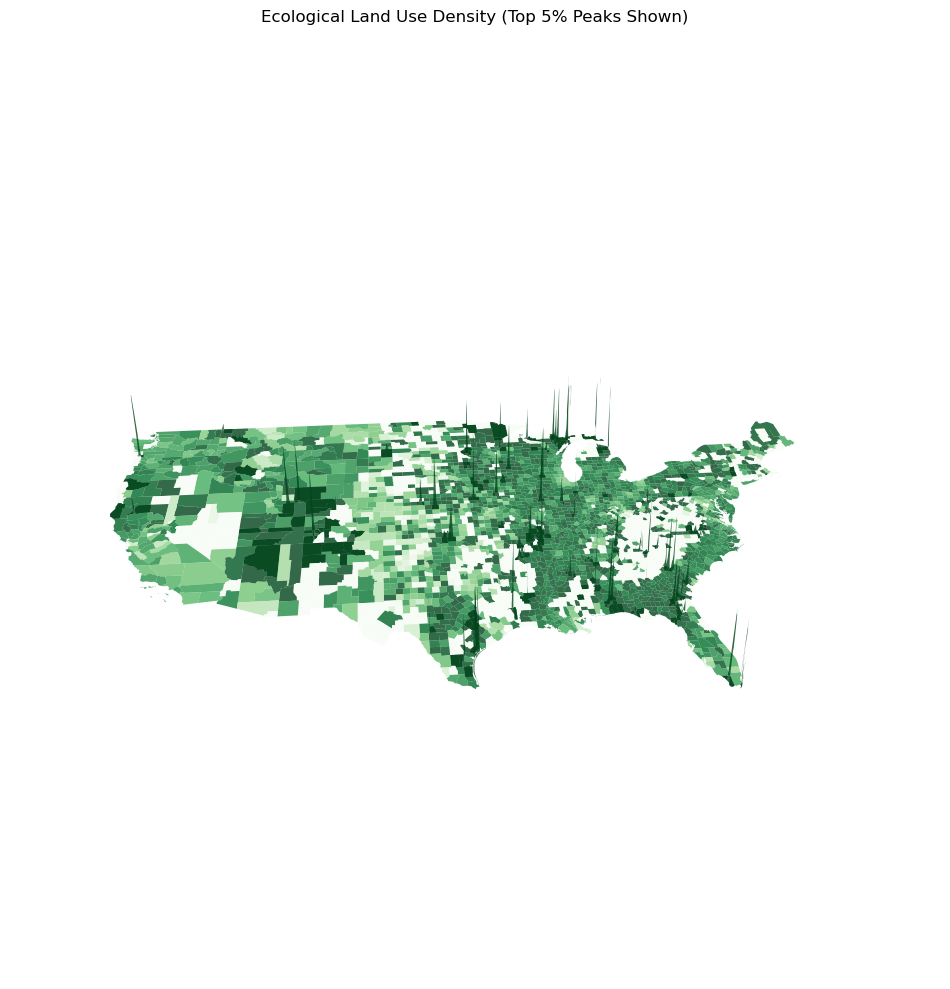

Calculating county densities for Agricultural type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

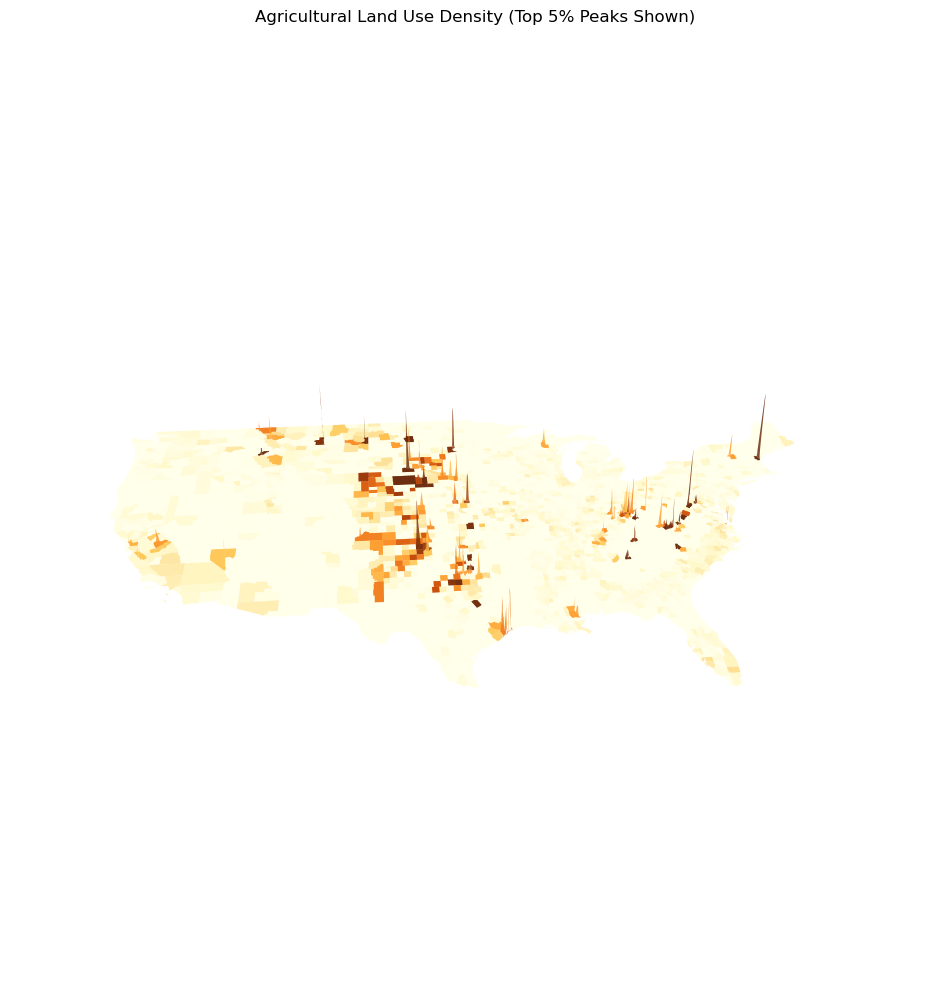

Calculating county densities for Others type...


  0%|          | 0/3108 [00:00<?, ?it/s]

  0%|          | 0/3108 [00:00<?, ?it/s]

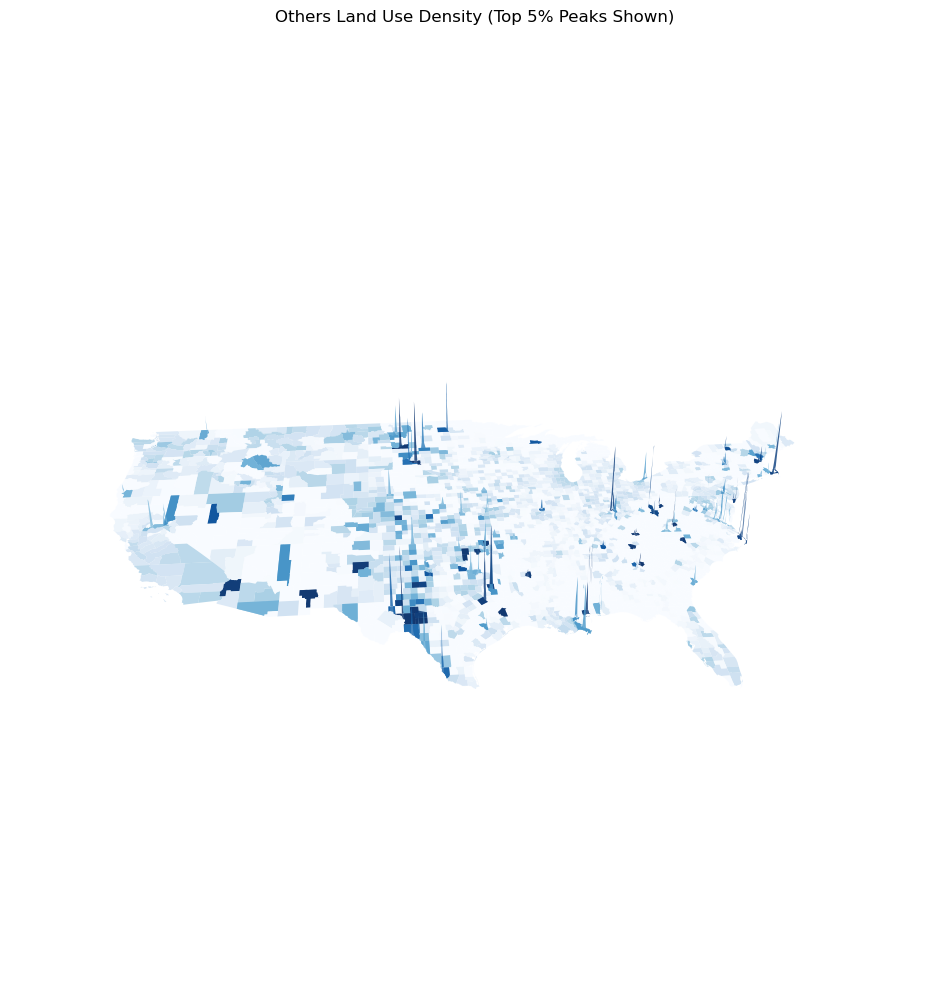

In [4]:
import geopandas as gpd
from function import * 
from shapely.geometry import box, Point
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from function import PATHS
from rtree import index
from tqdm.auto import tqdm

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 25,
    'lat_max': 49
}
bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])

# 读取county数据并裁剪到bbox范围
us_county = gpd.read_file(PATHS['us_county'])
us_county = us_county.to_crs(epsg=4326).clip(bbox)  # 确保使用WGS84坐标系并裁剪

# 读取密度数据
df = pd.read_csv("data/4.1_prediction_net_weighted.csv")

# Combine land use types
df['weighted_density_type1'] = df['weighted_density_2'] + df['weighted_density_6']  # Ecological
df['weighted_density_type2'] = df['weighted_density_1'] + df['weighted_density_5'] + df['weighted_density_7']  # Agricultural
df['weighted_density_type3'] = df['weighted_density_3'] + df['weighted_density_4'] + df['weighted_density_8'] + df['weighted_density_9']  # Others

# 过滤bound范围内的点
df = df[(df['lon'] >= usa_bounds_main['lon_min']) & 
        (df['lon'] <= usa_bounds_main['lon_max']) & 
        (df['lat'] >= usa_bounds_main['lat_min']) & 
        (df['lat'] <= usa_bounds_main['lat_max'])].reset_index(drop=True)

# 创建空间索引
print("Creating spatial index...")
spatial_index = index.Index()
for i, point in enumerate(zip(df['lon'], df['lat'])):
    spatial_index.insert(i, (point[0], point[1], point[0], point[1]))

type_names = ['Ecological', 'Agricultural', 'Others']
# Define color schemes for each type
color_schemes = [plt.cm.Greens, plt.cm.YlOrBr, plt.cm.Blues]

for idx in range(3):
    print(f"Calculating county densities for {type_names[idx]} type...")
    us_county[f'mean_density_type{idx+1}'] = 0.0  # Initialize density column
    
    for county_idx, county in tqdm(us_county.iterrows(), total=len(us_county)):
        bounds = county.geometry.bounds
        possible_points = list(spatial_index.intersection(bounds))
        
        points_in_county = []
        for point_idx in possible_points:
            point = Point(df.iloc[point_idx]['lon'], df.iloc[point_idx]['lat'])
            if county.geometry.contains(point):
                points_in_county.append(df.iloc[point_idx][f'weighted_density_type{idx+1}'])
        
        mean_density = np.mean(points_in_county) if points_in_county else 0
        us_county.at[county_idx, f'mean_density_type{idx+1}'] = mean_density

    # Create new figure for each type
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111, projection='3d')

    # 设置显示山峰的百分比阈值（1%）
    percentile = 5
    density_threshold = np.percentile(us_county[f'mean_density_type{idx+1}'].values, 100 - percentile)
    height_scale = 0.15
    sigma = 0.05  # 控制山峰的宽度，值越小山峰越陡峭

    # 绘制每个county的3D表示
    for _, county in tqdm(us_county.iterrows(), total=len(us_county)):
        county_boundary = county.geometry
        mean_density = county[f'mean_density_type{idx+1}']
        
        if mean_density >= 0:  # 只绘制有数据的county
            if county_boundary.geom_type == 'Polygon':
                x, y = county_boundary.exterior.xy
                x = np.array(x)
                y = np.array(y)
                
                # 创建底部平面
                verts_bottom = [list(zip(x, y, [0]*len(x)))]
                poly_bottom = Poly3DCollection(verts_bottom, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                ax.add_collection3d(poly_bottom)
                
                if mean_density > density_threshold:
                    # 创建山峰效果
                    center_x, center_y = np.mean(x), np.mean(y)
                    z = np.zeros_like(x)
                    for i in range(len(x)):
                        dist = np.sqrt((x[i] - center_x)**2 + (y[i] - center_y)**2)
                        z[i] = mean_density * 1 * np.exp(-(dist**2)/(2*sigma**2))
                    
                    # 创建顶部山峰
                    verts_top = [list(zip(x, y, z))]
                    poly_top = Poly3DCollection(verts_top, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                    ax.add_collection3d(poly_top)
                    
            elif county_boundary.geom_type == 'MultiPolygon':
                for polygon in county_boundary.geoms:
                    x, y = polygon.exterior.xy
                    x = np.array(x)
                    y = np.array(y)
                    
                    # 创建底部平面
                    verts_bottom = [list(zip(x, y, [0]*len(x)))]
                    poly_bottom = Poly3DCollection(verts_bottom, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                    ax.add_collection3d(poly_bottom)
                    
                    if mean_density > density_threshold:
                        # 创建山峰效果
                        center_x, center_y = np.mean(x), np.mean(y)
                        z = np.zeros_like(x)
                        for i in range(len(x)):
                            dist = np.sqrt((x[i] - center_x)**2 + (y[i] - center_y)**2)
                            z[i] = mean_density * 1 * np.exp(-(dist**2)/(2*sigma**2))
                        
                        # 创建顶部山峰
                        verts_top = [list(zip(x, y, z))]
                        poly_top = Poly3DCollection(verts_top, alpha=0.8, facecolor=color_schemes[idx](mean_density))
                        ax.add_collection3d(poly_top)

    # 设置视角
    ax.set_proj_type('persp', focal_length=0.25)
    ax.view_init(elev=30, azim=-95)

    # 设置坐标轴范围
    ax.set_xlim(usa_bounds_main['lon_min'], usa_bounds_main['lon_max'])
    ax.set_ylim(usa_bounds_main['lat_min'], usa_bounds_main['lat_max'])
    ax.set_zlim(0, 1)  # 设置z轴范围，这样高度缩放就会生效

    # 设置坐标轴比例
    ax.set_box_aspect([1.5, 1, height_scale])  # 设置x:y:z的比例为2:1:0.5

    # 设置标题
    ax.set_title(f'{type_names[idx]} Land Use Density (Top {percentile}% Peaks Shown)', pad=20)

    # 隐藏坐标轴
    ax.set_axis_off()

    # 调整布局并显示
    plt.tight_layout()
    plt.show()

## 2.4 HEX Map

### 2.4.1 大块HEX测试

gogogo
Data points: 70,312
Saved: figure/net_benefit_hexmap.png


c:\PhDart\cropland_co\Landuse_Zhong-1\function\haxgrid.py:182: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


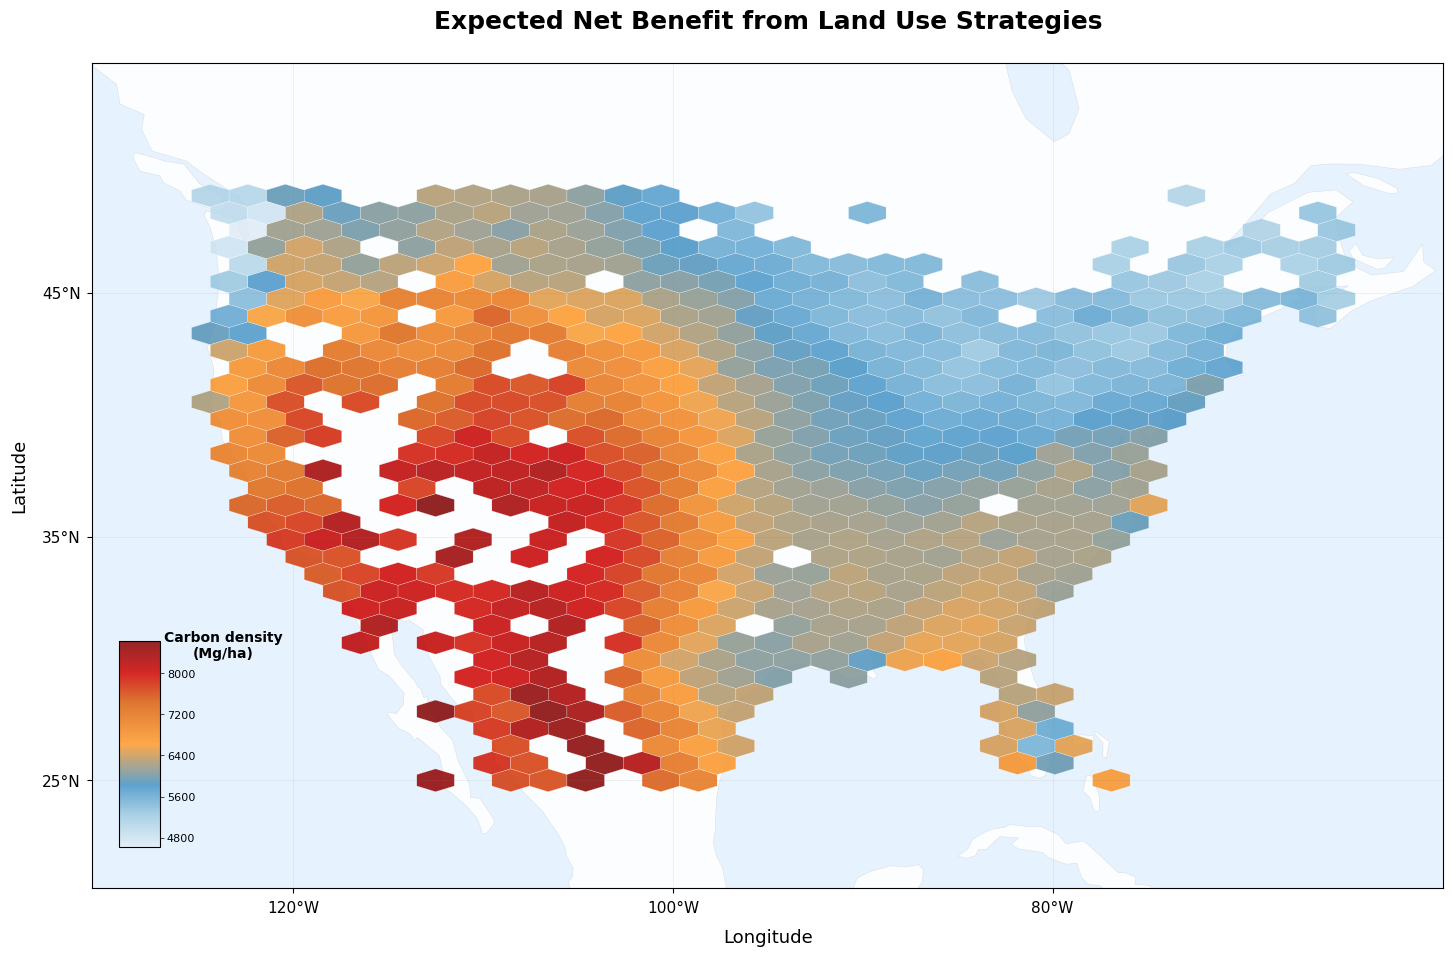

In [4]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from function import *
from function import PATHS
from shapely.geometry import Polygon, Point, box
from tqdm.auto import tqdm
import glob

%load_ext autoreload
%autoreload 2

df_strategies=pd.read_csv('data/4.df_strategies.csv')

# Define USA mainland bounds
usa_bounds_main = {
    'lon_min': -125,
    'lon_max': -65,
    'lat_min': 24,
    'lat_max': 51
}


bbox = box(usa_bounds_main['lon_min'], 
          usa_bounds_main['lat_min'], 
          usa_bounds_main['lon_max'], 
          usa_bounds_main['lat_max'])


gdf = gpd.read_file(PATHS['World_shp'])
us_bound = gdf[gdf['GID_0']=='USA']
us_bound = us_bound.to_crs(epsg=4326).clip(bbox)


# 将美国边界投影到EPSG:3857 (Web Mercator)
us_bound_proj = us_bound.to_crs(epsg=3857)

# 获取投影后的边界范围
xmin, ymin, xmax, ymax = us_bound_proj.total_bounds

# helper_shapefile = r'data\cb_2018_us_county_5m.shp'
# helper_shapefile = r'data\main_ADM_0.shp'
helper_shapefile=r'figure\draw_shp\ne_110m_land.shp'
fig1 = create_single_variable_hexmap(
    df_strategies, 
    variable='Expectation_net_benefit',
    title='Expected Net Benefit from Land Use Strategies',
    cmap=None,
    helper_shp=helper_shapefile,
    show_stats=True,
    save_path='figure/net_benefit_hexmap.png'
)



### 2.4.2低密度 HEX测试

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Data points: 70,312
  Medium sparsity (57.4% empty hexes), moderately increasing hex size
  Good hex density (31.8 points/hex), keeping size
  Reasonably uniform distribution (CV=1.61)
Grid optimization summary:
  Geographic area: 1620.0 sq degrees (ratio: 2.22)
  Data density: 43.4 points/sq degree
  Data count: 70,312 points
  Sparsity ratio: 57.4%
  Avg points/hex: 31.8
  Distribution CV: 1.61
  Gridsize range: [12, 100]
  Final gridsize: 100
Final gridsize: 100


c:\PhDart\cropland_co\Landuse_Zhong-1\function\haxgrid.py:333: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(pad=2.0)


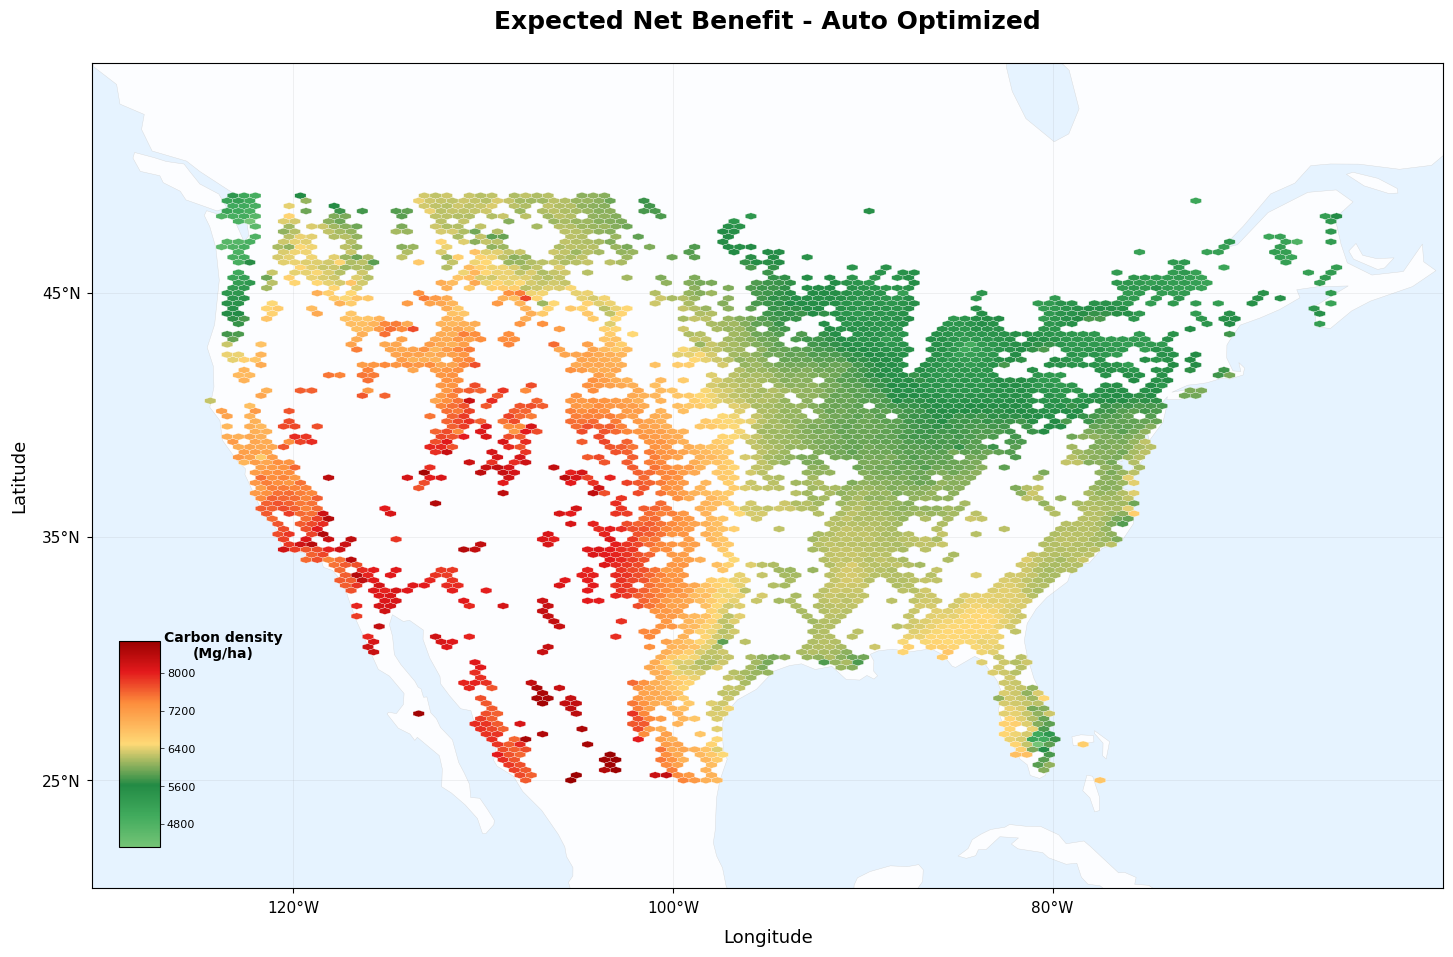

In [6]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from function import *
from function import PATHS
from shapely.geometry import Polygon, Point, box
from tqdm.auto import tqdm
import glob

%load_ext autoreload
%autoreload 2

df_strategies=pd.read_csv('data/4.df_strategies.csv')
helper_shapefile=r'figure\draw_shp\ne_110m_land.shp'


fig1 = create_adaptive_hexmap(
    df_strategies,
    variable='Expectation_net_benefit',
    title='Expected Net Benefit - Auto Optimized',
    auto_gridsize=True,  # 自动计算最优大小
    helper_shp=helper_shapefile
)


# fig, hull_data = create_hexmap_with_convex_hulls(
#     df_strategies, variable='Expectation_net_benefit',
#     helper_shp=helper_shapefile,
#     show_convex_hulls=True,
#     hull_style='both',          # 'line', 'fill', 或 'both'
#     n_clusters=6,               
#     min_cluster_size=200,       
#     buffer_ratio=0.05           
# )

# 2.5 Latitude Line Map

gogogo


c:\PhDart\cropland_co\Landuse_Zhong-1\function\lat_aggrline.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(group_cols)[variable]


Number of latitude intervals after aggregation: 240
Average data points per interval: 292.9


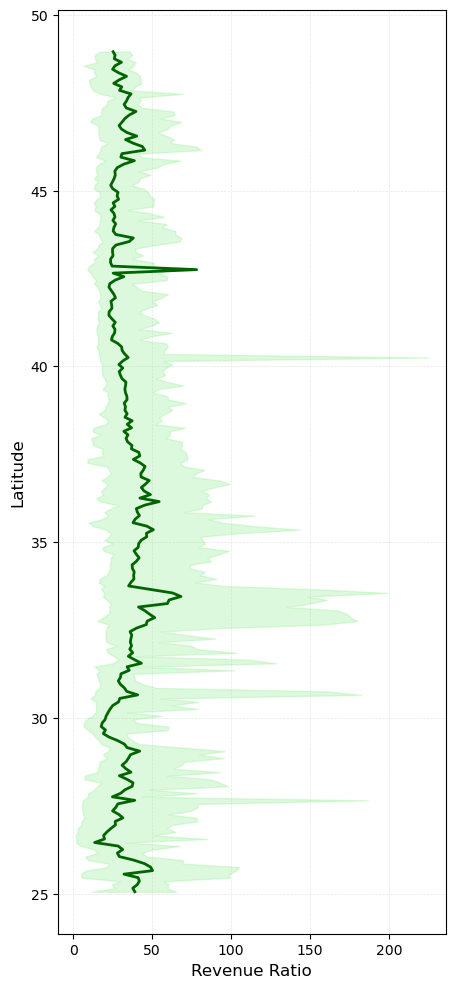

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from function.lat_aggrline import plot_revenue_ratio_by_latitude
import glob

%load_ext autoreload
%autoreload 2

df_strategies=pd.read_csv('data/4.df_strategies.csv')

fig2 =plot_revenue_ratio_by_latitude(
    df_strategies,
    variable='Revenue_ratio',
    lat_col='lat',
    lat_bin_size=0.1,  
    figsize=(5,12),
    save_path="figure/revenue_ratio_by_latitude_final.png"
)


# 2.6 Cloud Rain Map

gogogo
Original data points: 70,312
  Medium sparsity detected (50.1% empty hexes), moderately increasing hex size
  Good hex density (52.2 points/hex), keeping size
Grid optimization summary:
  Geographic area: 1620.0 sq degrees
  Data density: 43.4 points/sq degree
  Data count: 70,312 points
  Sparsity ratio: 50.1%
  Avg points/hex: 52.2
  Final gridsize: 80
Aggregated data points: 1,259
Aggregation ratio: 0.018


c:\PhDart\cropland_co\Landuse_Zhong-1\function\Cloudrain.py:318: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


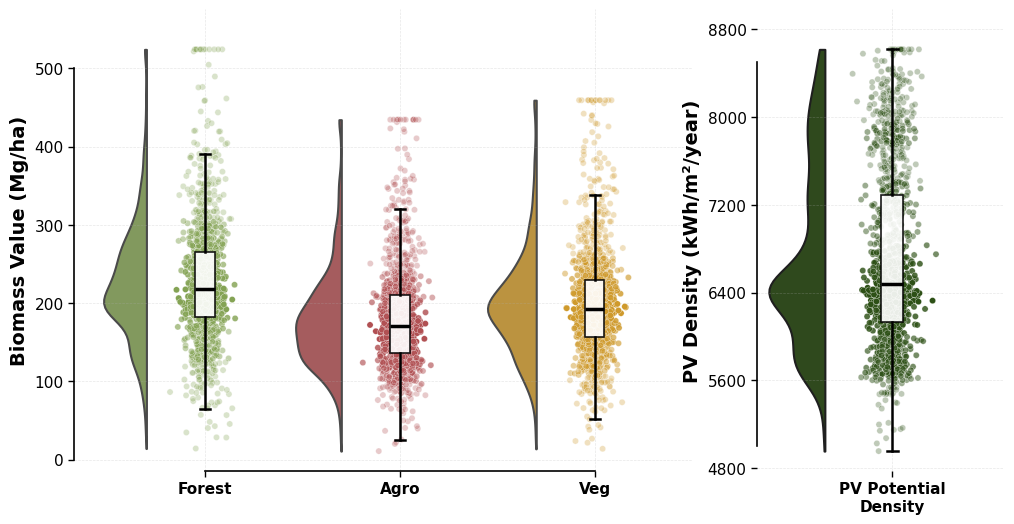

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ptitprince as pt
from scipy.stats import ttest_ind
from scipy.stats import binned_statistic_2d
import sys
sys.path.append('function')
from function import aggregate_data_like_hexmap,plot_cloudrain_distribution
import glob

%load_ext autoreload
%autoreload 2


# 1. 读取数据
df_strategies = pd.read_csv('data/4.df_strategies.csv')
# 调用函数
vars_primary = ["final_forest", "final_agro", "final_veg"]
var_secondary = "pv_potential_dens"
all_vars = vars_primary + [var_secondary]
# 使用蜂窝聚合方法
bounds = (-125, -65, 24, 51)  # 与蜂窝图相同的边界
aggregated_data = aggregate_data_like_hexmap(df_strategies, all_vars, bounds)

fig = plot_cloudrain_distribution(aggregated_data, vars_primary, var_secondary)


# 2.7 Decision map

,lat,lon,time,acc_forest,cap_forest,final_forest,weighted_density_Forest,weighted_density_Agricultural,weighted_density_Vegetation,acc_agro,cap_agro,final_agro,acc_veg,cap_veg,final_veg,env_scores,pv_potential_dens,Expectation_net_benefit,Revenue_ratio
0,25.004168,-107.545830,2020-01-01,202.64836,192.5,192.5,0.915529,0.000000,0.084471,141.051453,151.0,141.051453,148.67093,190.0,148.67093,0.305240,7781.567765,7592.770050,41.216430
1,25.004168,-99.720830,2020-01-01,255.71393,252.4,252.4,0.935189,0.003916,0.060895,205.889297,218.0,205.889297,241.11067,250.0,241.11067,0.289314,7666.688329,7415.157940,30.480167
2,25.004168,-99.712500,2020-01-01,255.74387,249.2,249.2,0.937221,0.003671,0.059108,205.889297,218.0,205.889297,239.50970,247.0,239.50970,0.282092,7702.433915,7453.965684,30.999673
3,25.004168,-77.387500,2020-01-01,715.28530,688.8,688.8,0.239518,0.000000,0.760482,577.347839,617.0,577.347839,605.91394,684.0,605.91394,0.267188,7261.162752,6635.396141,11.603628
4,25.012500,-107.612500,2020-01-01,201.17284,200.1,200.1,0.952143,0.006674,0.041183,140.078674,149.0,140.078674,149.22205,197.0,149.22205,0.264706,7722.962748,7525.358653,39.083010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70307,48.995834,-111.970830,2020-01-01,201.90521,182.2,182.2,0.952007,0.017433,0.030560,170.484009,179.0,170.484009,174.20488,182.0,174.20488,0.251081,6392.674772,6210.923349,35.172626
70308,48.995834,-110.345830,2020-01-01,221.94190,198.1,198.1,0.626705,0.332696,0.040599,175.665878,197.0,175.665878,177.52232,198.0,177.52232,0.296190,6395.853979,6206.053157,33.697715
70309,48.995834,-106.020836,2020-01-01,232.56694,207.1,207.1,0.889626,0.003256,0.107118,209.715591,206.0,206.000000,211.58206,207.0,207.00000,0.177785,6412.037900,6204.952188,30.963208
70310,48.995834,-104.087500,2020-01-01,249.97507,225.2,225.2,0.456741,0.057912,0.485347,204.508926,222.0,204.508926,207.61511,225.0,207.61511,0.284555,6292.888713,6077.421747,29.205817


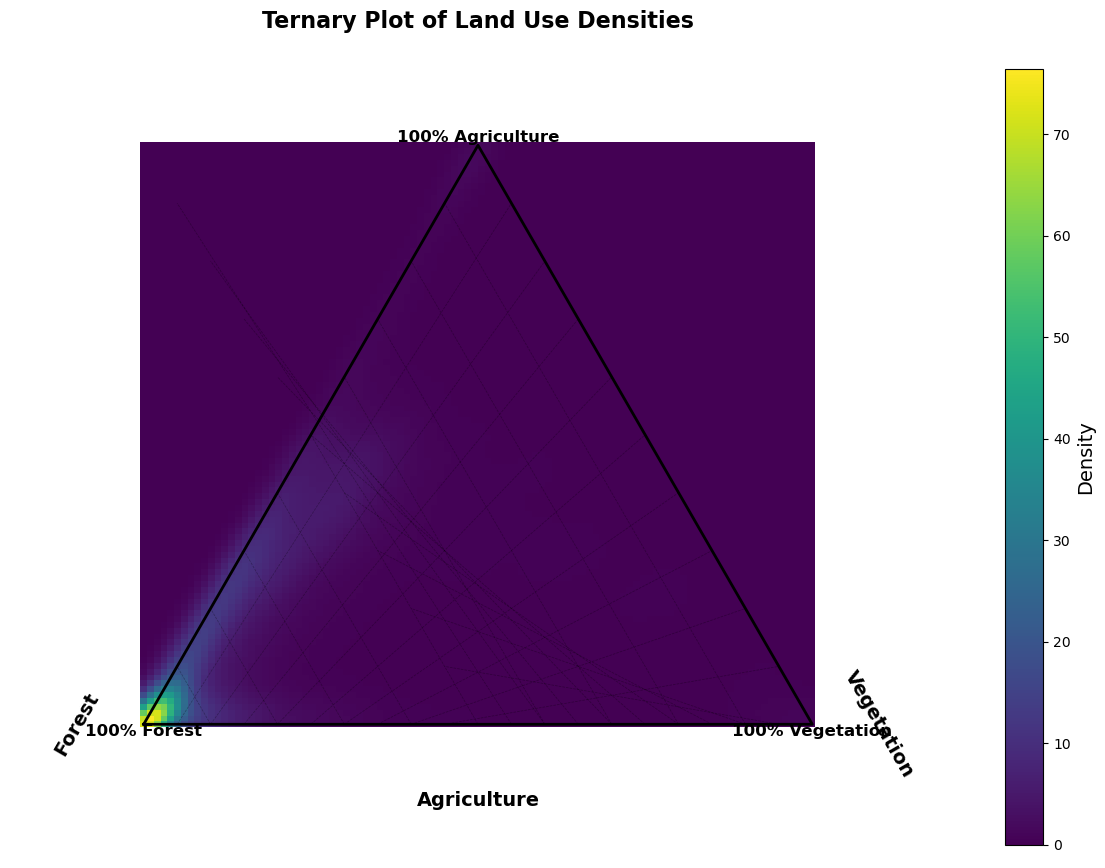

三角图统计信息:
总数据点数: 70312
Forest比例范围: 0.000 - 1.000
Agriculture比例范围: 0.000 - 1.000
Vegetation比例范围: 0.000 - 1.000


In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
from scipy.spatial import ConvexHull

# 获取三个变量的数据
forest_density = df_strategies['weighted_density_Forest']
agro_density = df_strategies['weighted_density_Agricultural'] 
veg_density = df_strategies['weighted_density_Vegetation']

# 数据预处理：标准化为比例
total_density = forest_density + agro_density + veg_density
mask = total_density > 0

forest_ratio = np.where(mask, forest_density / total_density, 0)
agro_ratio = np.where(mask, agro_density / total_density, 0)
veg_ratio = np.where(mask, veg_density / total_density, 0)

# 转换为三角坐标系
def ternary_to_cartesian(a, b, c):
    """将三角坐标转换为笛卡尔坐标"""
    x = 0.5 * (2 * b + c) / (a + b + c)
    y = (np.sqrt(3) / 2) * c / (a + b + c)
    return x, y

# 计算笛卡尔坐标
x_coords, y_coords = ternary_to_cartesian(forest_ratio[mask], 
                                         agro_ratio[mask], 
                                         veg_ratio[mask])

# 创建图形
fig, ax = plt.subplots(figsize=(12, 10))

# 绘制三角形边界
triangle = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
ax.plot(triangle[:, 0], triangle[:, 1], 'k-', linewidth=2)

# 创建网格进行密度计算
x_min, x_max = min(x_coords), max(x_coords)
y_min, y_max = min(y_coords), max(y_coords)
xi, yi = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]

# 计算核密度估计
positions = np.vstack([xi.ravel(), yi.ravel()])
values = np.vstack([x_coords, y_coords])
kernel = gaussian_kde(values)
z = np.reshape(kernel(positions).T, xi.shape)

# 绘制热力图
im = ax.pcolormesh(xi, yi, z, cmap='viridis', shading='auto')

# 添加颜色条
cbar = plt.colorbar(im, ax=ax, shrink=0.8, aspect=20)
cbar.set_label('Density', fontsize=14)

# 添加网格线
for i in range(1, 10):
    t = i / 10
    # 水平线 (constant Agriculture)
    ax.plot([t/2, (1+t)/2], [0, np.sqrt(3)/2 * (1-t)], 'k--', alpha=0.3, linewidth=0.5)
    # 左斜线 (constant Forest)
    ax.plot([t, t/2], [0, np.sqrt(3)/2 * t], 'k--', alpha=0.3, linewidth=0.5)
    # 右斜线 (constant Vegetation)
    ax.plot([1-t/2, (1-t)/2], [0, np.sqrt(3)/2 * t], 'k--', alpha=0.3, linewidth=0.5)

# 添加标签
ax.text(0.5, -0.1, 'Agriculture', ha='center', va='top', fontsize=14, fontweight='bold')
ax.text(-0.1, 0, 'Forest', ha='center', va='center', fontsize=14, fontweight='bold', rotation=60)
ax.text(1.1, 0, 'Vegetation', ha='center', va='center', fontsize=14, fontweight='bold', rotation=-60)

# 添加顶点标签
ax.text(0, 0, '100% Forest', ha='center', va='top', fontsize=12, fontweight='bold')
ax.text(1, 0, '100% Vegetation', ha='center', va='top', fontsize=12, fontweight='bold')
ax.text(0.5, np.sqrt(3)/2, '100% Agriculture', ha='center', va='bottom', fontsize=12, fontweight='bold')

# 设置图形属性
ax.set_xlim(-0.2, 1.2)
ax.set_ylim(-0.2, 1.0)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Ternary Plot of Land Use Densities', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# 打印统计信息
print("三角图统计信息:")
print(f"总数据点数: {mask.sum()}")
print(f"Forest比例范围: {forest_ratio[mask].min():.3f} - {forest_ratio[mask].max():.3f}")
print(f"Agriculture比例范围: {agro_ratio[mask].min():.3f} - {agro_ratio[mask].max():.3f}")
print(f"Vegetation比例范围: {veg_ratio[mask].min():.3f} - {veg_ratio[mask].max():.3f}")

我想要呈现什么信息：

利用撂荒地建设光伏来促进气候行动具有可行性

Fig.1 利用撂荒地进行光伏建设的政策优先级分区

整合三类可行性进行优先级分区（根据统计特征进行分位数的排序）其次展示三张统计类图片，展示两两变量之间的相关关系（图中数据包括：数据点密度热图、不同区域或者国家的分区回归线、总体回归与相关关系）

Extend figure: Spatial distribution of PV sites from 2015-2020

图表声明Fig.2 ： Policy feasibility

表达信息：光伏策略干预下的净碳期望，传统策略的碳期望及其联合概率分布，以及两者之间关系

1a、Net Carbon Accumulation Potential with existence of PV strategies
2b、The difference between Potential and Current Carbon density 
3c、Expected Emission Abatement Across Afforestation, Agricultural Use and Vegetation Regeneration
4d、Joint Probability Density Heatmap of Carbon Abatement Strategies

图表声明Fig.3 ：Economical Feasibility

表达信息：随着时间变化，传统策略中期望NPV是怎么随着时间变化累积


To delineate feasible trajectories of future PV and 


我能提供的数据：

AR6情境下

在Extend Fig中展示单维度的可行性空间分布（三张全球地图）

Fig.2 利用撂荒地进行光伏建设的净减排收益


Fig.3 

随着2020-2050光伏NPV累积曲线，传统策略期望的NPV累积曲线


In [ ]:
后续计划：

数据来源规范、第一部分模型升级